In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


#### 1. Bar Chart of Top 10 Countries by Confirmed Cases

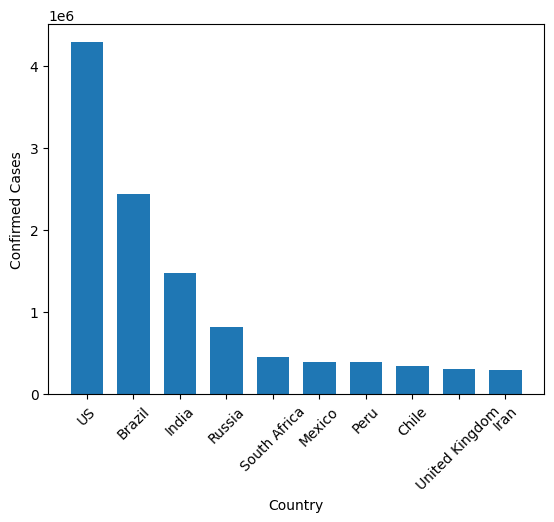

In [8]:
#df[['Country/Region','Confirmed']].iloc[df['Confirmed'].sort_values(ascending = False).index].head(10)
df1 = df[['Country/Region','Confirmed']].nlargest(10, 'Confirmed')
plt.bar(x = 'Country/Region', height = 'Confirmed', data= df1, align='center',width=.7,)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.show()

#### 2. Pie Chart of Global Death Distribution by Region

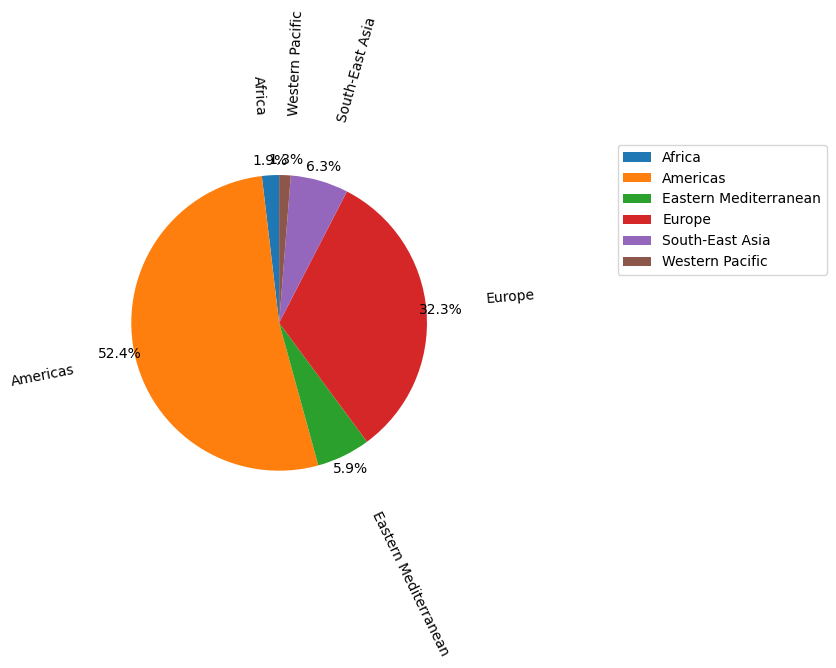

In [245]:
df2 = df.groupby('WHO Region')['Deaths'].sum()
plt.pie(x = df2.values, labels = df2.index, data= df2, autopct="%1.1f%%", startangle=90,rotatelabels=30,pctdistance=1.1, labeldistance=1.4)
plt.legend(bbox_to_anchor= (2,1))
plt.show()

#### 3. Line Chart comparing Confirmed and Deaths for Top 5 Countries


In [227]:
df3 = df[['Country/Region','Confirmed','Deaths']].nlargest(5, 'Confirmed')

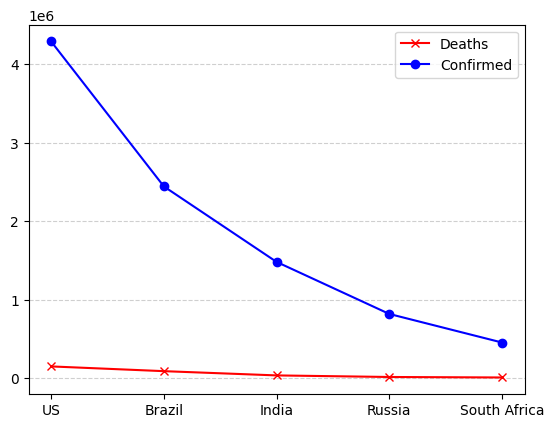

In [280]:
plt.plot(df3['Country/Region'], df3['Deaths'], marker='x', label='Deaths', color='red' )
plt.plot(df3['Country/Region'], df3['Confirmed'], marker='o', label='Confirmed', color='blue' )
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

#### 4. Scatter Plot of Confirmed Cases vs Recovered Cases

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 

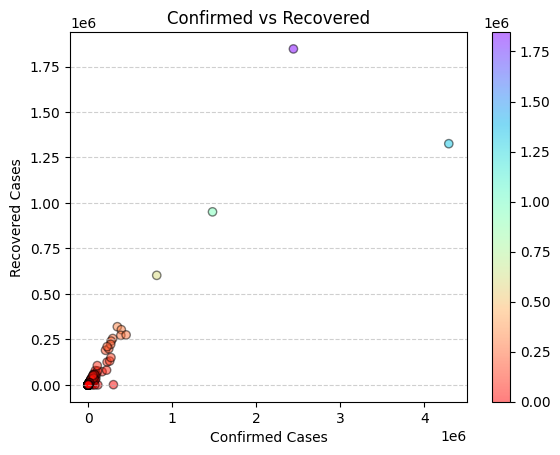

In [356]:
print(plt.colormaps)
plt.scatter(df['Confirmed'], df['Recovered'],
            c=df['Recovered'], cmap='rainbow_r',   # color by Deaths
            alpha=.5, edgecolor='black')
plt.colorbar()
plt.title("Confirmed vs Recovered")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered Cases")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

#### 5. Histogram of Death Counts across all Regions

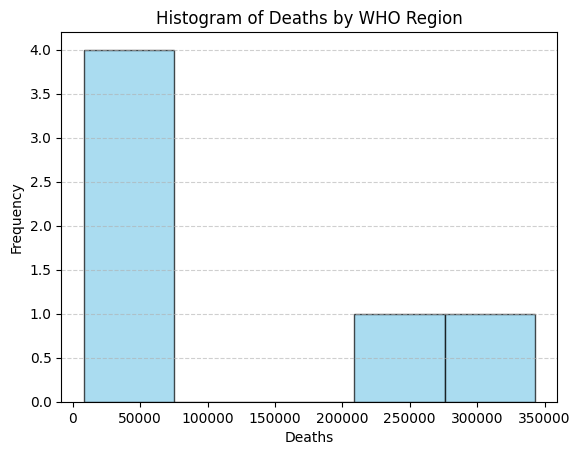

In [278]:
df5 = df.groupby('WHO Region')['Deaths'].sum()

plt.hist(df5.values, bins=5, color='skyblue', edgecolor='black', alpha=0.7)

plt.title("Histogram of Deaths by WHO Region")
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

#### 6. Stacked Bar Chart of Confirmed, Deaths, and Recovered for 5 Selected Countries

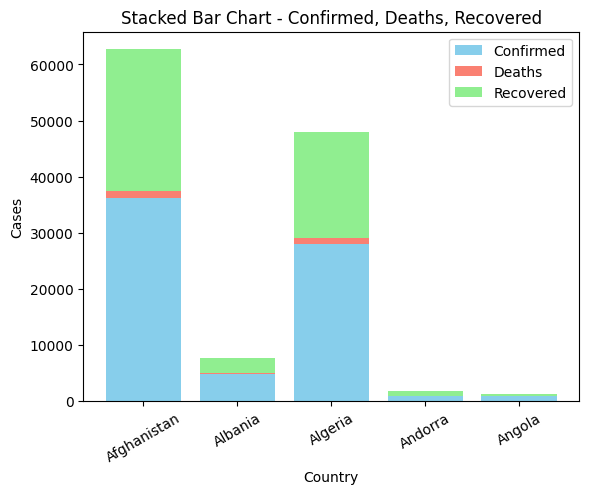

In [12]:
df6 = df[['Country/Region','Confirmed','Deaths','Recovered']].head(5)
plt.bar(df6['Country/Region'], df6['Confirmed'], label='Confirmed', color='skyblue')
plt.bar(df6['Country/Region'], df6['Deaths'], bottom=df6['Confirmed'], label='Deaths', color='salmon')
plt.bar(df6['Country/Region'], df6['Recovered'], bottom=df6['Confirmed']+df6['Deaths'], label='Recovered', color='lightgreen')

# Decorations
plt.title("Stacked Bar Chart - Confirmed, Deaths, Recovered")
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=30)
plt.legend()
plt.show()

#### 7. Box Plot of Confirmed Cases across Regions

<Figure size 1000x600 with 0 Axes>

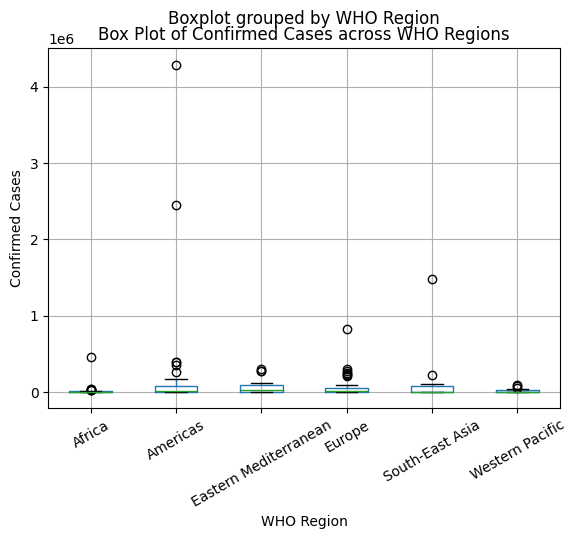

In [318]:
plt.figure(figsize=(10,6))
df.boxplot(column='Confirmed', by='WHO Region')
plt.title("Box Plot of Confirmed Cases across WHO Regions")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=30)
plt.show()

####  8. Trend Line: Plot Confirmed cases for India vs another chosen country (side by side comparison)

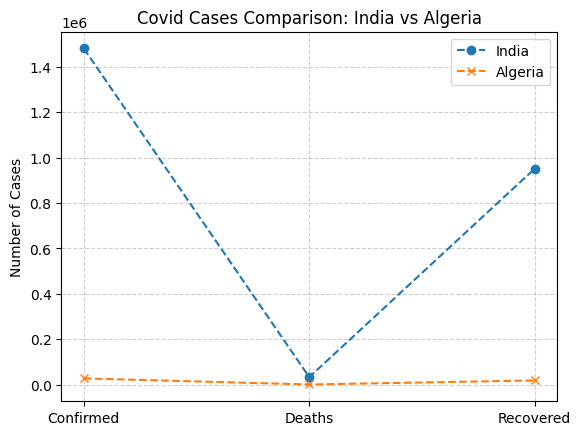

In [355]:
india = df[df['Country/Region'] == 'India'][['Confirmed','Deaths','Recovered']].iloc[0]
algeria = df[df['Country/Region'] == 'Algeria'][['Confirmed','Deaths','Recovered']].iloc[0]
categories = ['Confirmed','Deaths','Recovered']
plt.plot(categories, india.values, marker="o", linestyle="--", label="India")
plt.plot(categories, algeria.values, marker="x", linestyle="--", label="Algeria")
plt.title("Covid Cases Comparison: India vs Algeria")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()